<a href="https://colab.research.google.com/github/ShinSeong/aa05-iot/blob/master/iot_csv_aa05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas: Loading the remote csv file

> [Pandas: Tutorial-reas_csv()](https://www.marsja.se/pandas-read-csv-tutorial-to-csv/amp/)

In [0]:
import pandas as pd

In [0]:
# url="http://chaos.inje.ac.kr:3030/data/ppg5k.csv"  # CORS powered express server!
c=pd.read_csv('AA05_s1000.csv', index_col='date')

In [3]:
c.shape

(1000, 3)

In [5]:
c.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:39:20.124,21.9,31.8,49
2018-11-27 18:39:17.846,21.9,31.9,49
2018-11-27 18:39:15.574,21.9,32.0,50
2018-11-27 18:39:13.297,21.9,32.0,50
2018-11-27 18:39:11.023,21.9,32.1,49


In [6]:
c.tail()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:01:35.656,21.3,31.5,53
2018-11-27 18:01:33.382,21.3,31.4,58
2018-11-27 18:01:31.105,21.3,31.4,57
2018-11-27 18:01:28.832,21.3,31.4,58
2018-11-27 18:01:26.554,21.3,31.4,58


In [0]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2015-07-24 12:43:00.7 to 2015-07-24 12:47:12.3
Data columns (total 1 columns):
PPG    5000 non-null int64
dtypes: int64(1)
memory usage: 78.1+ KB


In [0]:
# another method to read csv 
c2=pd.read_csv(url, index_col=0)
c2.head()

,PPG
Time,
2015-07-24 12:43:00.7,444
2015-07-24 12:43:00.8,425
2015-07-24 12:43:00.8,423
2015-07-24 12:43:00.9,415
2015-07-24 12:43:00.9,406


In [0]:
# import matplotlib.pyplot as plt
%matplotlib inline

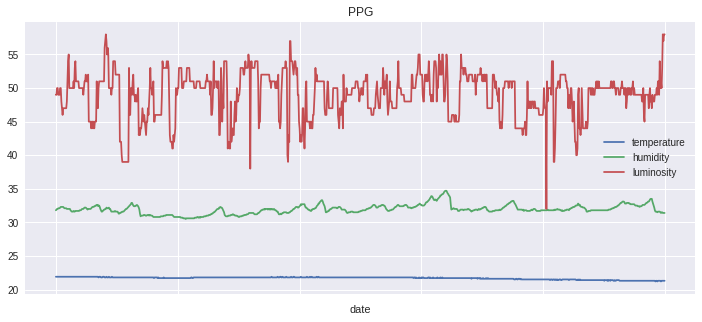

In [10]:
c.plot(figsize=(12,5), title="PPG")

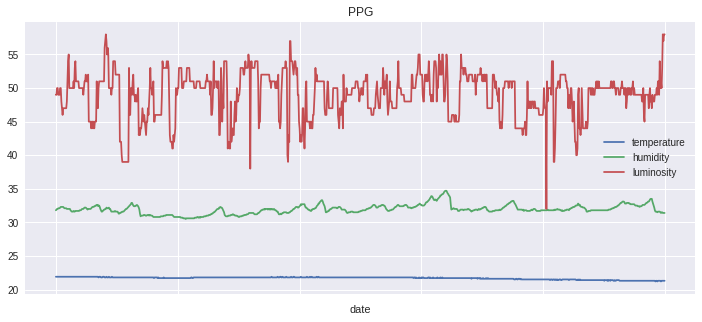

In [11]:
c[:1000].plot(figsize=(12,5),title="PPG")

### iot data
> Sensor data from Arduino with CdS and DHT22

- temperature
- humidity
- luminosity

In [0]:
url="http://chaos.inje.ac.kr:3030/data/iot_chaos.csv"
iot=pd.read_csv('AA05_s1000.csv', index_col='date')

In [45]:
iot.shape

(1000, 3)

In [46]:
iot.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:39:20.124,21.9,31.8,49
2018-11-27 18:39:17.846,21.9,31.9,49
2018-11-27 18:39:15.574,21.9,32.0,50
2018-11-27 18:39:13.297,21.9,32.0,50
2018-11-27 18:39:11.023,21.9,32.1,49


In [47]:
iot.tail()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:01:35.656,21.3,31.5,53
2018-11-27 18:01:33.382,21.3,31.4,58
2018-11-27 18:01:31.105,21.3,31.4,57
2018-11-27 18:01:28.832,21.3,31.4,58
2018-11-27 18:01:26.554,21.3,31.4,58


In [48]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-11-27 18:39:20.124 to 2018-11-27 18:01:26.554
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2+ KB


### Sort index by date

In [0]:
iot_s = iot.sort_index()

In [50]:
iot_s.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:01:26.554,21.3,31.4,58
2018-11-27 18:01:28.832,21.3,31.4,58
2018-11-27 18:01:31.105,21.3,31.4,57
2018-11-27 18:01:33.382,21.3,31.4,58
2018-11-27 18:01:35.656,21.3,31.5,53


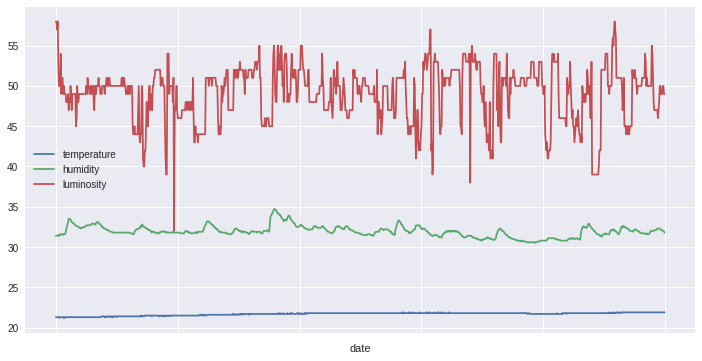

In [51]:
iot_s.plot(figsize=(12,6))

In [52]:
iot_s.mean()

temperature    21.6856
humidity       31.9386
luminosity     49.0660
dtype: float64

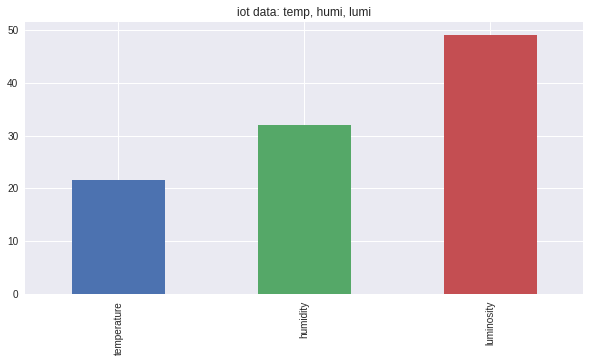

In [53]:
iot_s.mean().plot.bar(figsize=(10,5), title="iot data: temp, humi, lumi")

## Plot the change of sensor data over various time spans.

- resample the data at different frequency
- time span: 60 sec, 1 hour, 1 day, 1 week

In [54]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-11-27 18:01:26.554 to 2018-11-27 18:39:20.124
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2+ KB


In [55]:
# type of index
iot_s.index[0], type(iot_s.index[0])

('2018-11-27 18:01:26.554', str)

In [0]:
# Convert index to timestamp
iot_s.index = pd.to_datetime(iot_s.index)

In [57]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-11-27 18:01:26.554000 to 2018-11-27 18:39:20.124000
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


In [58]:
# Estimate the mean of iot_s for every hour
iot_s.resample('2S').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2018-11-27 18:01:26,21.3,31.4,58.0
2018-11-27 18:01:28,21.3,31.4,58.0
2018-11-27 18:01:30,21.3,31.4,57.0
2018-11-27 18:01:32,21.3,31.4,58.0
2018-11-27 18:01:34,21.3,31.5,53.0
2018-11-27 18:01:36,21.3,31.5,50.0
2018-11-27 18:01:38,NaN,NaN,NaN
2018-11-27 18:01:40,21.2,31.4,51.0
2018-11-27 18:01:42,21.3,31.5,50.0


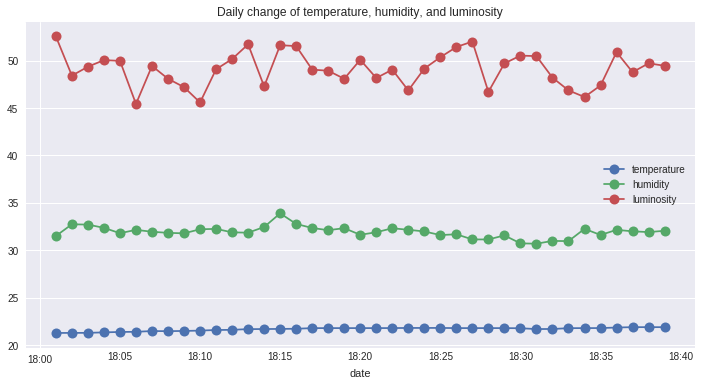

In [61]:
#  Plot mean of the iot data per every day
iot_s.resample('60S').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='Daily change of temperature, humidity, and luminosity')

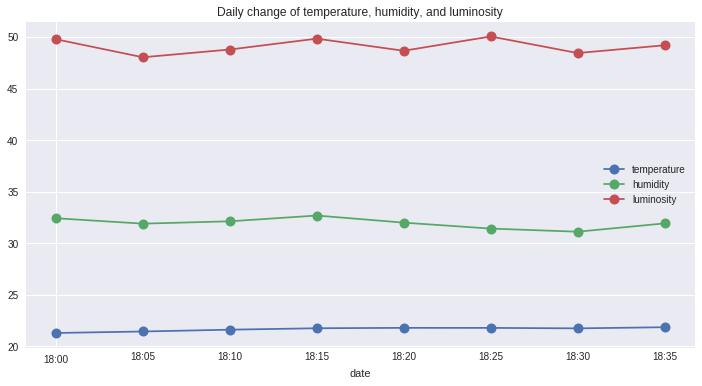

In [62]:
#  Plot mean of the iot data per every day
iot_s.resample('300S').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='Daily change of temperature, humidity, and luminosity')

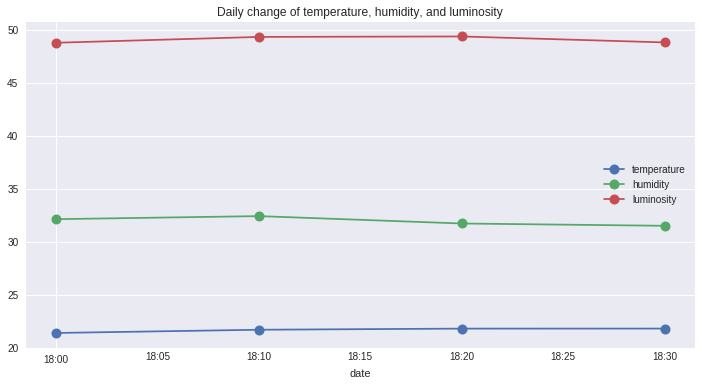

In [63]:
#  Plot mean of the iot data per every day
iot_s.resample('600S').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='Daily change of temperature, humidity, and luminosity')



---

